# OpenCV Basics
In this document we will be using basic OpenCV usage.
We can use the MatPlotLib library to view images

In [8]:
import cv2 #OpenCV is not installed if we make an error and get error here.
print cv2.__version__
#import numpy, matplotlib and set plotting to be inline
import numpy as np

3.3.1-dev


In [9]:
import matplotlib #matplotlib is not installed if we make an error and get error here.
import matplotlib.pyplot as plt
%matplotlib inline 
print matplotlib.__version__

2.1.2


### Picture Reading from File

In [10]:
bgr_img = cv2.imread("1.jpg")
ori_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB) # OpenCV converts the picture to rgb because it reads in bgr space by default

print ori_img.shape

(536, 858, 3)


### Displaying the Image on the Screen

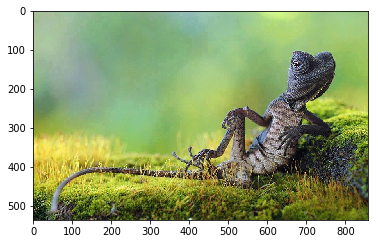

In [11]:
plt.imshow(ori_img)

### Converting and Saving to Official Grayscale

In [12]:
gray_image = cv2.cvtColor(ori_img, cv2.COLOR_RGB2GRAY)
cv2.imwrite("Gray.jpg", gray_image)

True

### Mirror

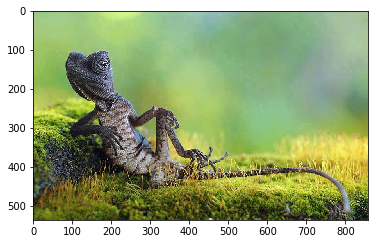

In [13]:
rotated=cv2.flip(ori_img,1)
plt.imshow(rotated)

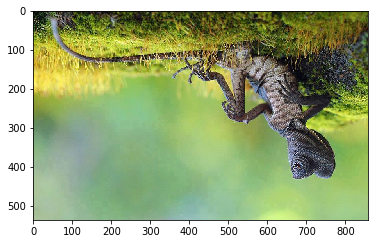

In [14]:
rotated=cv2.flip(ori_img,0)
plt.imshow(rotated)

### Image Sizing

In [15]:
print ori_img.shape #the picture is shown in the jupiter at a certain size. We printed the original size.


(536, 858, 3)


(50, 100, 3)


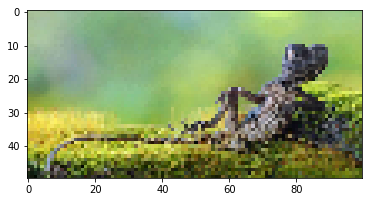

In [16]:
resized_image = cv2.resize(ori_img, (100, 50)) 
plt.imshow(resized_image)
print resized_image.shape

### Crop Image

(100, 200, 3)


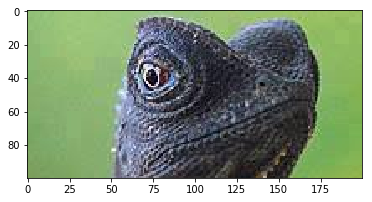

In [17]:
crop_image = ori_img[100:200,600:800] # [ymin:ymax,xmin:xmax]
plt.imshow(crop_image)
print crop_image.shape

In [18]:
### Change Over Image

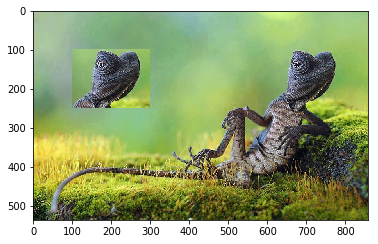

In [19]:
tmp1=ori_img.copy()
tmp2 = tmp1[100:250, 600:800]
tmp1[100:250, 100:300] = tmp2
plt.imshow(tmp1)

In [20]:
import random

In [21]:
img=cv2.imread('1.jpg',0)
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(5,50),font,1,(255,255,255),2,cv2.LINE_AA)
cv2.imwrite('img_putText.jpg',img)

True

In [22]:
#image segmentation and shuffling

In [23]:
# paths for local testing
img_path = 'racecar-j.jpg'
img_save_path = 'segmentation.jpg'

#open image and get its shape
img = cv2.imread(img_path)
img_shape = img.shape
img_shape

(580, 1000, 3)

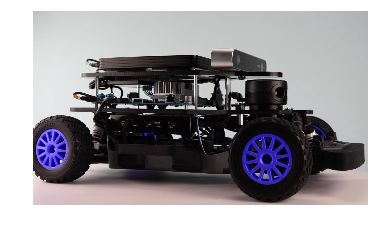

In [24]:
#display image
plt.axis("off")
plt.imshow(img)
plt.show()

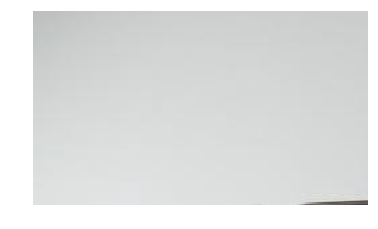

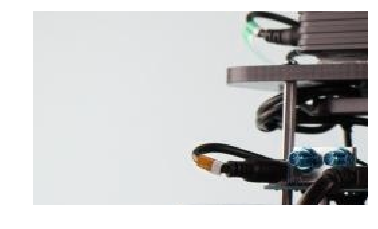

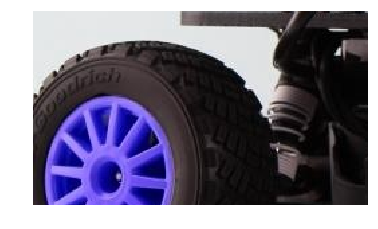

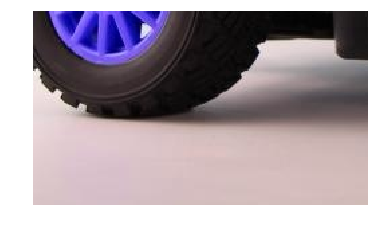

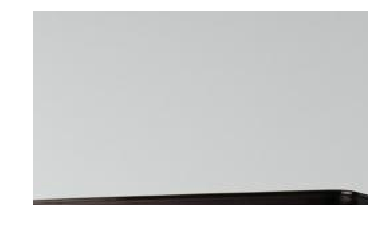

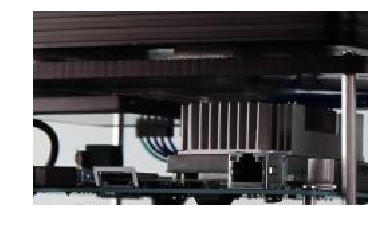

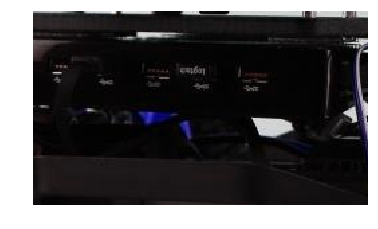

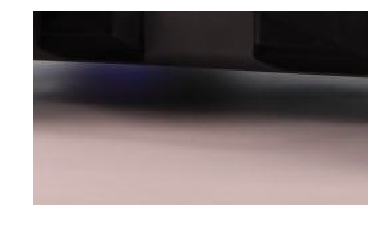

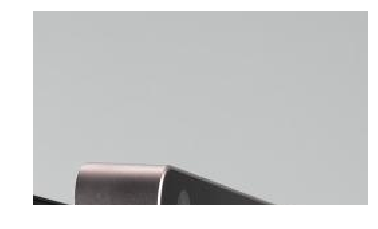

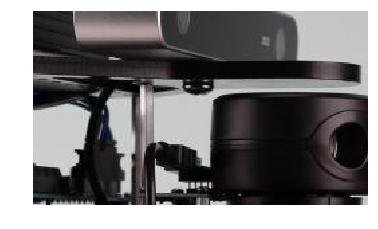

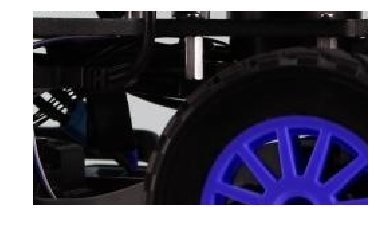

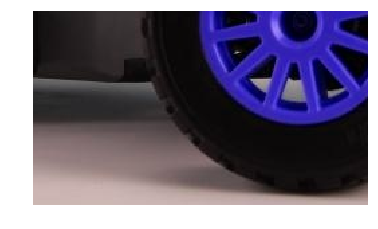

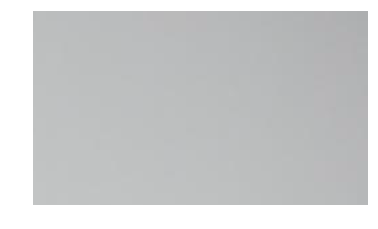

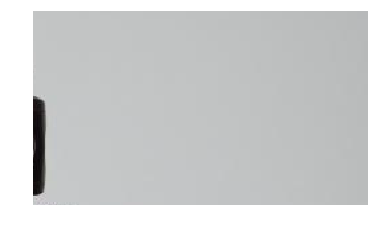

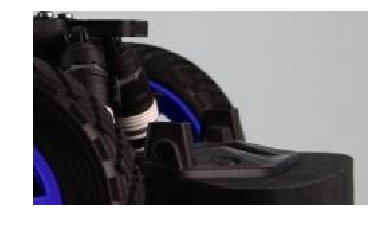

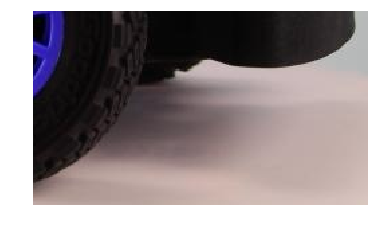

In [25]:
# specify the width & height of each part
part_w = img_shape[1]/4
part_h = img_shape[0]/4
img_parts = []

#slice image into parts of specified width and height
for i in range(4):
    for j in range(4):
        x_min = i*part_w
        x_max = x_min + part_w
        y_min = j*part_h
        y_max = y_min + part_h
        img_parts.append(img[y_min:y_max,x_min:x_max,:])
                             
#display the different parts
for part in img_parts:
    plt.axis("off")
    plt.imshow(part)
    plt.show()

In [26]:
swapped_image = np.zeros_like(img)
n = []

# generate random sequence to pick parts
while len(n) < 16:
    tmp = random.randint(0, 15)
    if tmp in n:
        pass
    else:
        n.append(tmp)

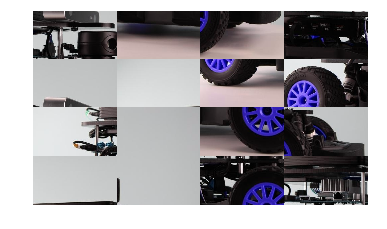

In [27]:
#stick the parts together
for i in range(4):
    for j in range(4):
        x_min = i*part_w
        x_max = x_min + part_w
        y_min = j*part_h
        y_max = y_min + part_h
        swapped_image[y_min:y_max,x_min:x_max,:] = img_parts[n.pop()]

#display the new image
plt.axis('off')
plt.imshow(swapped_image)
plt.show()

In [28]:
#write image to file
cv2.imwrite(img_save_path,swapped_image)

True